# 15 Ανάλυση δεδομένων με την βιβλιοθήκη pandas Ι 

<div class="alert alert-block alert-info" style="margin-top: 20px">


<b>ΣΥΝΟΠΤΙΚΑ</b>

Σε αυτό το μάθημα θα κάνουμε μια εισαγωγή στην χρήση της βιβλιοθήκης `pandas`. Πιο συγκεκριμένα θα δούμε:
    
- τα αντικείμενα της
    
- πως τα διαχειριζόμαστε 
    
- άνοιγμα αρχείων και εγγραφή 
    
</div>

- - - 

## 15.1 Εισαγωγή 

Η ``pandas`` είναι μια [βιβλιοθήκη](https://pandas.pydata.org/) που προσφέρει ένα γρήγορο, ισχυρό, ευέλικτο και εύκολο ταυτόχρονα τρόπο για την διαχείριση και την ανάλυση δεδομένων. Έχει χτιστεί πάνω στη βιβλιοθήκη ``numpy`` και επιτρέπει ένα υψηλότερο επίπεδο επεξεργασίας δεδομένων από μια ποικιλία διαφορετικών τύπων αρχείων (π.χ. csv, Excel, JSON). 

Η εισαγωγή της γίνεται όπως έχουμε ήδη δει:

```python
import pandas as pd
```

με το `pd` να αποτελεί την σύνηθες συντόμευση. 

## 15.2 Τα αντικείμενα ``DataFrame`` και ``Series``

Με τη βιβλιοθήκη ``pandas`` μπορούμε πολύ εύκολα να διαβάσουμε διαφόρων τύπων αρχεία (π.χ. csv, xsl, κτλ) μέσα σε μια γραμμή κώδικα. Το αντικείμενο που επιστρέφεται αποτελεί τη βασική δομή της βιβλιοθήκης και ονομάζεται **DataFrame**. Το αντικείμενο αυτό δεν είναι τίποτα περισσότερο από μία 2D απεικόνιση δεδομένων, δηλαδή ένας πίνακας που αποτελείται από γραμμές και στήλες.

<div>
    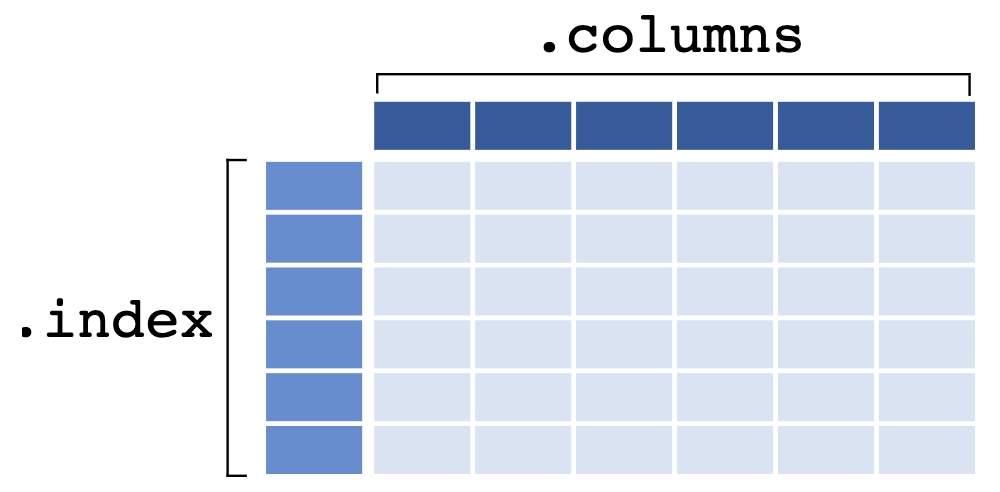
</div>

Μία τέτοια δομή δεδομένων δεν μας είναι άγνωστη. Ειδικά, αν σκεφτούμε ότι οι στήλες αναφέρονται σε κάποια ποσότητα ή μετρήσιμο μέγεθος, ενώ οι γραμμές αναφέρονται στις τιμές αυτής της ποσότητας/μεγέθους, αυτός ο συνδυασμός θυμίζει ένα ζευγάρι κλειδιού-τιμής (key-value) όπως είδαμε στην περίπτωση των λεξικών.

Άρα, μπορεί κάποιος να σκεφτεί ένα DataFrame σαν ένα λεξικό που έχει τέτοια ζευγάρια κλειδιών-τιμών όπου η τιμή είναι μία λίστα που περιέχει το σύνολο των τιμών/γραμμών για το δεδομένο κλειδί.

Έχοντας ένα λεξικό μπορούμε εύκολα λοιπόν να το εκφράσουμε ως DataFrame χρησιμοποιώντας τη βασική μέθοδο της βιβλιοθήκης ``pandas.DataFrame``.

In [ ]:
students = {
    "first_name": ["Maria", "Kostas", "Nikos"],
    "last_name": ["Maraki", "Kostakis", "Nikakis"],
    "email": ["maraki@physics.uoc.gr", "kostakis@physics.uoc.gr", "nikakis@physics.uoc.gr"],
    "code": ['ph9900', 'ph9902', 'ph9906'],
    "thesis_field": ["Astrophysics", "Quantum Mechanics", "Atomic Physics"],
    "working hours per day": [5,7,6]
}
students

In [ ]:
type(students)

In [ ]:
# Access a key (column)
students["email"]

In [ ]:
# in case you get warnings, you can surpress them with this
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import pandas as pd

df = pd.DataFrame(students)
df

In [ ]:
type(df)

Παρατηρείστε ότι το DataFrame έχει, αριστερά του πίνακα, κάτι που μοιάζει με μια στήλη χωρίς όνομα. Αυτό ονομάζεται **δείκτης (index)**. Ο δείκτης κάθε γραμμής είναι ουσιαστικά ένας ακέραιος αριθμός και αποτελεί ένα είδους "ταυτότητας" για τη συγκεκριμένη γραμμή. Είναι με άλλα λόγια το όνομα της γραμμής.

In [ ]:
df.index

Μπορούμε να πάρουμε τα ονόμαντα (ετικέτες) όλων των στηλών χρησιμοποιώντας την εντολή `df.columns` (μέθοδο που εφαρμόζεται πάνω στο Data Frame).

In [ ]:
# Returns column names
df.columns

Μπορούμε να έχουμε πρόσβαση στις τιμές μιας στήλης ενός DataFrame με το ίδιο συντακτικό που χρησιμοποιούμε και στα λεξικά.

In [ ]:
# Access a column (key)
df["email"]

Προσέξτε ότι η στήλη που πήραμε από το DataFrame δεν είναι ακριβώς η ίδια με το αποτέλεσμα που πήραμε από το απλό λεξικό. Αυτό συμβαίνει γιατί μια στήλη από ένα DataFrame είναι ένα άλλο αντικείμενο που ονομάζεται **Series**.

Αντικείμενα τύπου Series αποτελούν μια 1D αναπαράσταση δεδομένων, παρόμοια με μια λίστα ή ένα μονοδιάστατο array. Παρ' όλα αυτά, όπως και στην περίπτωση του DataFrame σε σχέση με ένα λεξικό, ένα αντικείμενο τύπου Series συνοδεύεται από πολλές και ποικίλες δυνατότητες συγκριτικά με μια λίστα. 

Άρα μπορεί να σκεφτεί κανείς ότι ένα DataFrame είναι μια συλλογή από πολλά αντικείμενα τύπου Series.

In [ ]:
type(df["email"])

## 15.3 Διαχείριση δομών δεδομένων

### 15.3.1 Πρόσβαση σε πολλαπλές στήλες ενός DataFrame

Σε αντίθεση με τα λεξικά, σε ένα DataFrame μπορούμε να έχουμε πρόσβαση σε ένα μεμονωμένο σύνολο στηλών που μας ενδιαφέρουν δίνοντας σαν όρισμα **μια λίστα** με τα ονόματα των στηλών που θέλουμε. Αυτό που θα επιστραφεί είναι ουσιαστικά μια φιλτραρισμένη εκδοχή του αρχικού DataFrame.

In [ ]:
# Notice the syntax and 
# the order the columns appear compared to original df
df[['thesis_field', "first_name"]]

### 15.3.2 Πρόσβαση σε γραμμές ενός DataFrame

Για να έχουμε πρόσβαση στις γραμμές ενός DataFrame χρησιμοποιούμε τους δείκτες ``loc`` ή ``iloc``.

- Ο δείκτης ``loc``: αναφέρεται στη θέση της γραμμής μέσα στο DataFrame όταν αυτή έχει κάποια ετικέτα (location -> loc).

- Ο δείκτης ``iloc``: αναφέρεται στη θέση της γραμμής μέσα στο DataFrame βάσει του δείκτη (integer location -> iloc).


Χρησιμοποιώντας αυτούς τους δείκτες μπορούμε να πάρουμε τις γραμμές και από συγκεκριμένες στήλες δίνοντας σαν δεύτερο όρισμα το όνομα (στην περίπτωση του δείκτη loc) ή τον δείκτη της στήλης (στην περίπτωση του δείκτη iloc).

Γενικά ισχύει:

    df.loc[[rows_label], [columns_name]]
    
    df.iloc[[rows_indexes], [columns_indexes]]
    
Οι παραπάνω έννοιες φαίνονται πολύπλοκες αλλά είναι πιο εύκολα κατανοητές μέσω παραδειγμάτων.

#### Χρήση του ``iloc``

In [ ]:
# Note: iloc/loc are indexers => use of square brackets
df.iloc[[1]]

In [ ]:
# Access multiple rows by specific indeces,
df.iloc[[1,2]]

In [ ]:
# or by providing a range
df.iloc[0:2]

In [ ]:
# or by getting everything 
df.iloc[:]

Μπορούμε να επιλέξουμε και γραμμές και στήλη.

In [ ]:
# This will fetch the last two rows of the second column
df.iloc[1:3, 1]

In [ ]:
# This will fail with iloc!
df.iloc[1:3, "last_name"]

#### Χρήση του ``loc``

In [ ]:
df.loc[0:2]

Αφού χρησιμοποιούμε την ετικέτα για τις γραμμές μπορούμε να επιλέξουμε επιπλέον στήλη (στήλες) με τα ονόματά τους.

In [ ]:
# Notice that we can use the 
# column name with the loc indexer
df.loc[0:2, "last_name"]

In [ ]:
# we can pass a range of column names
df.loc[0:2, "last_name":"code"]

In [ ]:
# or we can specify the columns to use
df.loc[1:2, ("last_name","code",'email')]

In [ ]:
df.loc[1:3, ("last_name","code",'email')]

In [ ]:
# Corrensdongly, this will fail with loc!
df.loc[0:2, 1]

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
&#9755; **Σημείωση 1**: Όταν χρησιμοποιούμε το `iloc` επιλέγουμε γραμμές με βάση τον δείκτη τους και άρα θα πρέπει να χρησιμοποιήσουμε μόνο δείκτες για τις στήλες που θέλουμε να επιλέξουμε. Όταν όμως χρησιμοποιούμε το `loc` τότε επιλέγουμε γραμμές με βάση την ετικέτα τους και άρα θα πρέπει να χρησιμοποιοήσουμε τα αντίστοιχα ονόματα (ετικέτες) για τις στήλεςν.
     
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
&#9755; **Σημείωση 2**: Όταν χρησιμοποιούμε το `iloc` με ένα συγκεκριμένο εύρος τιμών (π.χ. `df.iloc[0:2]`) τότε αυτό συμπεριφέρεται όπως περιμένουμε, δηλαδή 'τεμαχίζει' (slice) το dataframe **χωρίς να συμπεριλαμβάνει το άκρο**. (εδώ δηλαδή θα σταματήσει στο 1). Αντίθετα στην περίπτωση του `loc` δεν πρόκειται για τεμαχισμό αλλά για τις ετικέτες που θα συμπεριλάβει και θα επιστρέψει. Οπότε τότε θα επιστρέψει όλες τις γραμμές που είναι μέσα στο εύρος αυτό, **συμπεριλαμβανομένου του άκρου** (π.χ. τις γραμμές με δείκτες 0, 1, 2).
     
</div>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 15.1</b>
    
Από το Data Frame που χρησιμοποιούμε ήδη:<br><br>

1. Επιστρέψτε όλες τις γραμμές με τις στήλες "code, thesis_field, email". 

2. Με όποιον τρόπο θέλετε επιστρέψτε το "thesis_field" και το "code" για τους κωδικούς ph9902 & ph9906. 

</div>

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary>> Λύση </summary></b>
    
```python 
1. df[['code', 'thesis_field', 'email']]

2. df.loc[1:2, ('thesis_field', 'code')]
    
```
    
</details>

### 15.3.3 Προσθήκη στηλών στο υπάρχον DataFrame

Μια από τις πιο σημαντικές δυνατότητες που μας δίνει η χρήση της δομής δεδομένων ενός **DataFrame** είναι να προσθέσουμε καινούργιες στήλες. Για αυτό ορίζουμε το όνομα (ετικέτα) της στήλης μέσα από το `df['new name']` ίση με μια τιμή (είναι σταθερή είτε μέσα από κάποια πράξη).

Για παράδειγμα, έχοντας την πληροφορία των ωρών εργασίας ανά ημέρα θα μπορούσαμε να υπολογίσουμε σε μια νέα στήλη τις συνολικές ώρες εργασίας ανά μήνα. 

In [ ]:
df['working hours per month'] = df['working hours per day'].values*25
df

In [ ]:
print(df['working hours per day'].values)
print( type(df['working hours per day'].values))

**Προσέξτε** εδώ την χρήση της μεθόδου ``values``. Ουσιαστικά με την σύνταξη ``df[column_name].values`` μετατρέπουμε όλη την στήλη σε ένα ndarray σαν αυτά που είδαμε στην numpy. 

### 15.3.4 Μετονομασία στηλών στο υπάρχον DataFrame

Μια άλλη δυνατότητα που μας παρέχει η δομή δεδομένων **DataFrame** είναι η μετονομασία μιας ή παραπάνω στηλών της επιλογής μας στο υπάρχον data frame με την χρήση της μεθόδου ``rename``. 
Η σύνταξη της μεθόδου είναι: ``df.rename(columns={'Old name':'New name'})``. 

**Παρατηρήστε** ότι την στήλη ή τις στήλες που θέλουμε να μετονομάσουμε τις δίνουμε σαν ένα λεξικό που σαν κλειδί έχει το παλιό όνομα της στήλης και σαν τιμή το νέο όνομα. 

Για παράδειγμα έστω ότι θέλουμε να μετονομάσουμε την στήλη που φτιάξαμε προηγουμένως,**'working hours per month'** σε **'total working hours per month'**. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
&#9755; **Προσοχή**: Προκειμένου να μας προστατέψει από το να κάνουμε αλλαγές που δεν θέλουμε στο αρχικό DataFrame, το ``pandas`` σχεδόν ποτέ δεν αλλάζει το αρχικό DataFrame εκτός αν συμπεριλάβουμε την παράμετρο ``inplace=True``. Αν έχουμε την προεπιλεγμένη τιμή ``inplace=False`` τότε θα μας επιστρέψει μια "εικόνα" της αλλαγής αφήνοντας το αρχικό DataFrame ανεπηρέαστο.
     
</div>

In [ ]:
df.rename(columns={'working hours per month':'total working hours per month'},inplace=True)
df

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 15.2</b>
    
Στο Data Frame που χρησιμοποιούμε ήδη, προσθέστε μια οποιαδήποτε στήλη (με όποιο περιεχόμενο θέλετε. Στη συνέχεια βρείτε ένα τρόπο να την διαγράψετε. 
</div>

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary>> Λύση </summary></b>
    
```python 
new_column = 'number of papers read'

df[new_column] = [12,9,6]
df.drop(new_column, axis=1, inplace=True)
df    
```
    
</details>

### 15.3.5 Αλλαγή του ονόματος των γραμμών (δείκτη - index)

Μερικές φορές (ανάλογα με το σύνολο δεδομένων) συμφέρει, αντί να χρησιμοποιήσουμε έναν ακέραιο αριθμό για να ταυτοποιήσουμε και να αναφερόμαστε σε κάθε γραμμή, να χρησιμοποιήσουμε κάτι άλλο για την ταυτοποίησή της. Αυτό μπορεί να είναι μια *ετικέτα* (label) με κάποια μοναδική τιμή που θα χαρακτηρίζει τη συγκεκριμένη γραμμή.

Στο συγκεκριμένο παράδειγμα μια καλή επιλογή για ετικέτα θα ήταν ο κωδικός καθώς είναι κάτι το μοναδικό και θα μπορούσε να μας βοηθήσει να αναφερόμαστε σε κάποια γραμμή βάσει αυτού.

In [ ]:
df.set_index('code', inplace=True)
df

In [ ]:
df.index

Πλέον η στήλη με τους κωδικούς δεν αποτελεί μέρος των δεδομένων αλλά χρησιμοποιείται ως ετικέτα για την κάθε γραμμή.

In [ ]:
# 'code' serves as label and is not included in columns anymore
df.columns

In [ ]:
# This will fail now, 
# since 'code' is NOT a column!
df["code"]

Τώρα μπορεί να φανεί πιο καθαρά η διαφορά μεταξύ των ``loc`` και ``iloc``.

In [ ]:
# iloc with numbers will still work
df.iloc[1:3, 0:2]

In [ ]:
# but we can use labels in loc
df.loc['ph9900':'ph9906', "first_name":"last_name"]

Για την **επαναφορά** στους αρχικούς δείκτες (και επιστροφής της ετικέτας που χρησιμοποιήσαμε σαν δείκτη στις στήλες) χρησιμοποιούμε την μέθοδο `df.reset_index()`. 

In [ ]:
df.reset_index(inplace=True)
df

**Σημείωση**: Η επαναφορά γίνεται αλλά μπαίνει σαν πρώτη στήλη. Δεδομένου ότι δουλεύουμε συνήθως με τα ονόματα των στηλών αυτό δεν είναι απαραίτητα σοβαρό πρόβλημα, αλλά αν θέλουμε να έχουμε μια σαφή σειρά στις στήλες θα πρέπει να την καθορίσουμε.

In [ ]:
# Assigning a df with a specific order of columns
df = df[[ 'first_name', 'last_name', 'email', 'code', 'thesis_field',
       'working hours per day', 'total working hours per month']]
df

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 15.3</b>
    
Στο Data Frame του παραδείγματος που χρησιμοποιούμε ήδη, αλλάξτε τους δείκτες έτσι ώστε να βλέπουν στο email, τυπώστε και επιστρέψτε στη συνέχεια στους κανονικούς δείκτες. 
    
> ΤΙΡ: για την αντιστροφή χρησιμοποιήστε και την εντολή πιο πάνω ώστε οι στήλες να μπουν στην ίδια σειρά.      

</div>

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary>> Λύση </summary></b>
    
```python 
df.set_index('email', inplace=True)
df
    
df.reset_index(inplace=True)
df = df[[ 'first_name', 'last_name', 'email', 'code', 'thesis_field',
       'working hours per day', 'total working hours per month']]
df    
```
    
</details>

### 15.3.6 Προσθήκη μια νέας γραμμής 

Για την προσθήκη μια νέας γραμμής θα πρέπει να προσδιορίσουμε τον δείκτη γραμμής που θα μπει και να δώσουμε τις αντίστοιχες τιμές για κάθε στήλη.  

In [ ]:
# Adding another entry at the very end of the df 
df.loc[len(df)] = {'first_name': 'Sifis', 'last_name': 'Sifakis', 
                   'email':'sifakis@physics.uoc.gr', 'code': 'ph9988', 
                   'thesis_field':'Laser Optics',
                  'working hours per day': 4, 
                   'total working hours per month': 100}

In [ ]:
df

Στην περίπτωση που έχουμε αλλάξει τον αρχικό δείκτη (πχ χρησιμοποιώντας τον κωδικό) η προσθήκη μια νέας γραμμής μπορεί να γίνει και πάλι αρκεί να βάλουμε τον νέο δείκτη (κωδικό) και όλα τα σχετικά πεδία. 

In [ ]:
df.set_index('code', inplace=True)
df

In [ ]:
# Adding another entry with specific index (code)
df.loc['ph9999'] = {'first_name': 'Eleni', 'last_name': 'Elenaki', 
                   'email':'elenaki@physics.uoc.gr', 
                   'thesis_field':'Microelectronics',
                  'working hours per day': 5, 
                   'total working hours per month': 125}

df

**Προσοχή**: Θα πρέπει η νέα γραμμή να περιέχει όλες τις στήλες που αναλογούν στο Data Frame.

## 15.4 Άνοιγμα αρχείου και εγγραφή

### 15.4.1 Άνοιγμα αρχείου

Η βιβλιοθήκη `pandas` προσφέρει μια μεγάλη γκάμα από [μεθόδους ανοίγματος αρχείων](https://pandas.pydata.org/docs/reference/io.html) (`pd.read_*`). Μια από τις πιο συνηθισμένες επιλογές είναι τα csv αρχεία (comma separated values). Μπορούμε πολύ εύκολα να διαβάσουμε ένα αρχείο χρησιμοποιώντας την μέθοδο `pd.read_csv()` ([περισσότερα](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)). Η μέθοδος αυτή είναι αντίστοιχη με αυτές της `numpy` αλλά πάντα εδώ επιστρέφεται το περιεχόμενο του αρχείου σαν ένα αντικείμενο DataFrame.  

In [ ]:
# using previous example files
df1 = pd.read_csv("data_files/basic.csv")

df1

In [ ]:
# using previous example files
df2 = pd.read_csv("data_files/q_u_data.csv")

df2

### 15.4.2  Εγγραφή σε αρχείο

Ταυτόχρονα με το άνοιγμα προσφέρονται και όλες οι [αντίστοιχες μέθοδοι](https://pandas.pydata.org/docs/reference/io.html) (`pd.to_*`) με τις οποίες μπορούμε να γράψουμε τα αποτελέσματά μας σε διάφορα αρχεία. Μετά την όποια διαχείριση των δεδομένων μπορούμε εύκολα να γράψουμε τα αποτελέσματά μας σε ένα αρχείο .csv χρησιμοποιώντας την μέθοδο `pd.to_csv()` ([περισσότερα](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)). 

In [ ]:
# .head returns the first N rows of a df
df2_part = df2.head(5)
print(df2_part)

# and save only them to a csv file
df2_part.to_csv("data_files/pandas_q_u_data.csv", index=False) # index=False means do not write row's index

In [ ]:
!cat 'data_files/pandas_q_u_data.csv'

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 15.4</b>
    
Διαβάστε το αρχείο "data_files/exams_data.csv" σε ένα ``DataFrame`` και απαντήστε/λύστε τις ακόλουθες ερωτήσεις.<br><br>

1. Από το ``DataFrame`` που δημιουργήσατε επιστρέψτε πίσω τις στήλες **"name"**,**"attempts"**.


2. Με την χρήση της μεθόδου ``iloc`` επιστρέψτε πίσω τις πρώτες 3 σειρές από το ``DataFrame``.


3. Με την χρήση της μεθόδου ``iloc`` επιστρέψτε πίσω τις πρώτες 5 σειρές και την 2η και 3η στήλη από το ``DataFrame``.


4. Με την χρήση της μεθόδου ``loc`` επιστρέψτε πίσω τις πρώτες 3 σειρές από το ``DataFrame``.


5. Με την χρήση της μεθόδου ``loc`` επιστρέψτε πίσω τις πρώτες 5 σειρές και την 2η και 3η στήλη από το ``DataFrame``.


6. Μετονομάσετε τις στήλες **"name"** και **"score"** σε **"NAME"** και **"SCORE"**, αντίστοιχα.


7. Αλλάξτε τα indexes του ``DataFrame`` χρησιμοποιώντας ως νέους δείκτες τις τιμές της στήλης **"labels"**.


8. Επιστρέψτε πίσω τις σειρές του ``DataFrame`` με indexes από a έως f και τις στήλες **"NAME"**,**"attempts"** και **"qualify"**.


9. Επαναφέρετε τα αρχικά indexes του ``DataFrame``.

In [ ]:
# You can try task # 1 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary>> Λύση #1 </summary></b>
    
```python 
exdf = pd.read_csv("data_files/exams_data.csv")
print(exdf)
    
exdf[["name", "attempts"]]
```
    
</details>

In [ ]:
# You can try task # 2 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση #2</summary></b>
    
```python 
exdf.iloc[0:3]
```
    
</details>

In [ ]:
# You can try task # 3 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση #3</summary></b>
    
```python 
exdf.iloc[0:5, [1,2]]
```
    
</details>

In [ ]:
# You can try task # 4 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση #4</summary></b>
    
```python 
exdf.loc[0:2]
```
    
</details>

In [ ]:
# You can try task # 5 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση #5</summary></b>
    
```python 
exdf.loc[0:5, ["score", "attempts"]]
```
    
</details>

In [ ]:
# You can try task # 6 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση #6</summary></b>
    
```python 
# Notice that by default inplace=False,
# so the initial DataFrame would be left unchanged
exdf.rename(columns={"name":"NAME", "score":"SCORE"}, inplace=True)
exdf
```
    
</details>

In [ ]:
# You can try task # 7 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση #7</summary></b>
    
```python 
exdf.set_index("labels", inplace=True)
exdf
```
    
</details>

In [ ]:
# You can try task # 8 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση #8</summary></b>
    
```python 
exdf.loc["a":"f", ["NAME", "attempts", "qualify"]]
```
    
</details>

In [ ]:
# You can try task # 9 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση #9</summary></b>
    
```python 
exdf.reset_index(inplace=True)
exdf
```
    
</details>

In [ ]:
# EOF